In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [103]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [104]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [105]:
# df['Spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [106]:
le = LabelEncoder()
df['Spam'] = le.fit_transform(df.Category)
df

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [107]:
# Count occurrences of each category
category_counts = df['Category'].value_counts()
category_counts

Category
ham     4825
spam     747
Name: count, dtype: int64

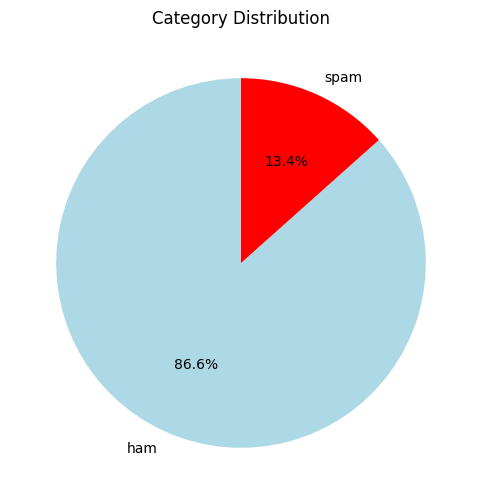

In [108]:
# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title('Category Distribution')
plt.show()

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.25, random_state=0)

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [112]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [113]:
X_test_count = v.transform(X_test)
X_test_count

<1393x7541 sparse matrix of type '<class 'numpy.int64'>'
	with 17352 stored elements in Compressed Sparse Row format>

In [114]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [115]:
model.score(X_test_count, y_test)

0.9877961234745154

## sklearn Pipeline
* to make the process easier as we have to call 'v.transform()' again and again

In [116]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [117]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [119]:
clf.score(X_test,y_test)

0.9877961234745154

In [120]:
clf.predict(emails)

array([0, 1])

Text(0.5, 1.0, 'Confusion Matrix')

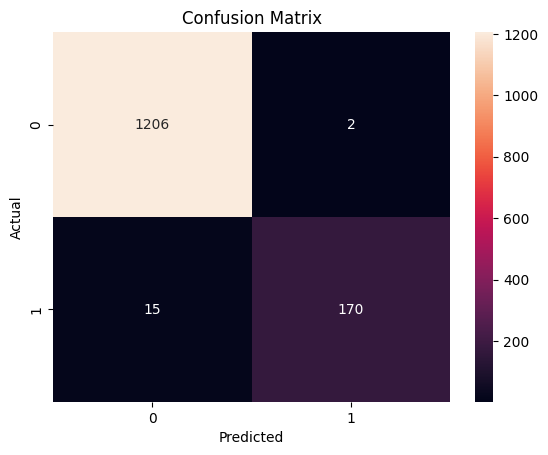

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')